In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('yield_df.csv')

In [66]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [67]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [68]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [69]:
df.shape

(28242, 7)

In [70]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [72]:
df.duplicated().sum() #No of Duplicate Rows

2310

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.duplicated().sum() 

0

In [75]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


# Transforming average_rain_fall_mm_per_year

This code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not float. These rows can be considered for removal or further processing, depending on the specific use case.

In [76]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [77]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
# To find numeric string

In [78]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [79]:
to_drop

Int64Index([], dtype='int64')

In [80]:
df = df.drop(to_drop)

In [81]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [82]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area
This will count the frequinces of area in this df

In [83]:
len(df['Area'].unique())

101

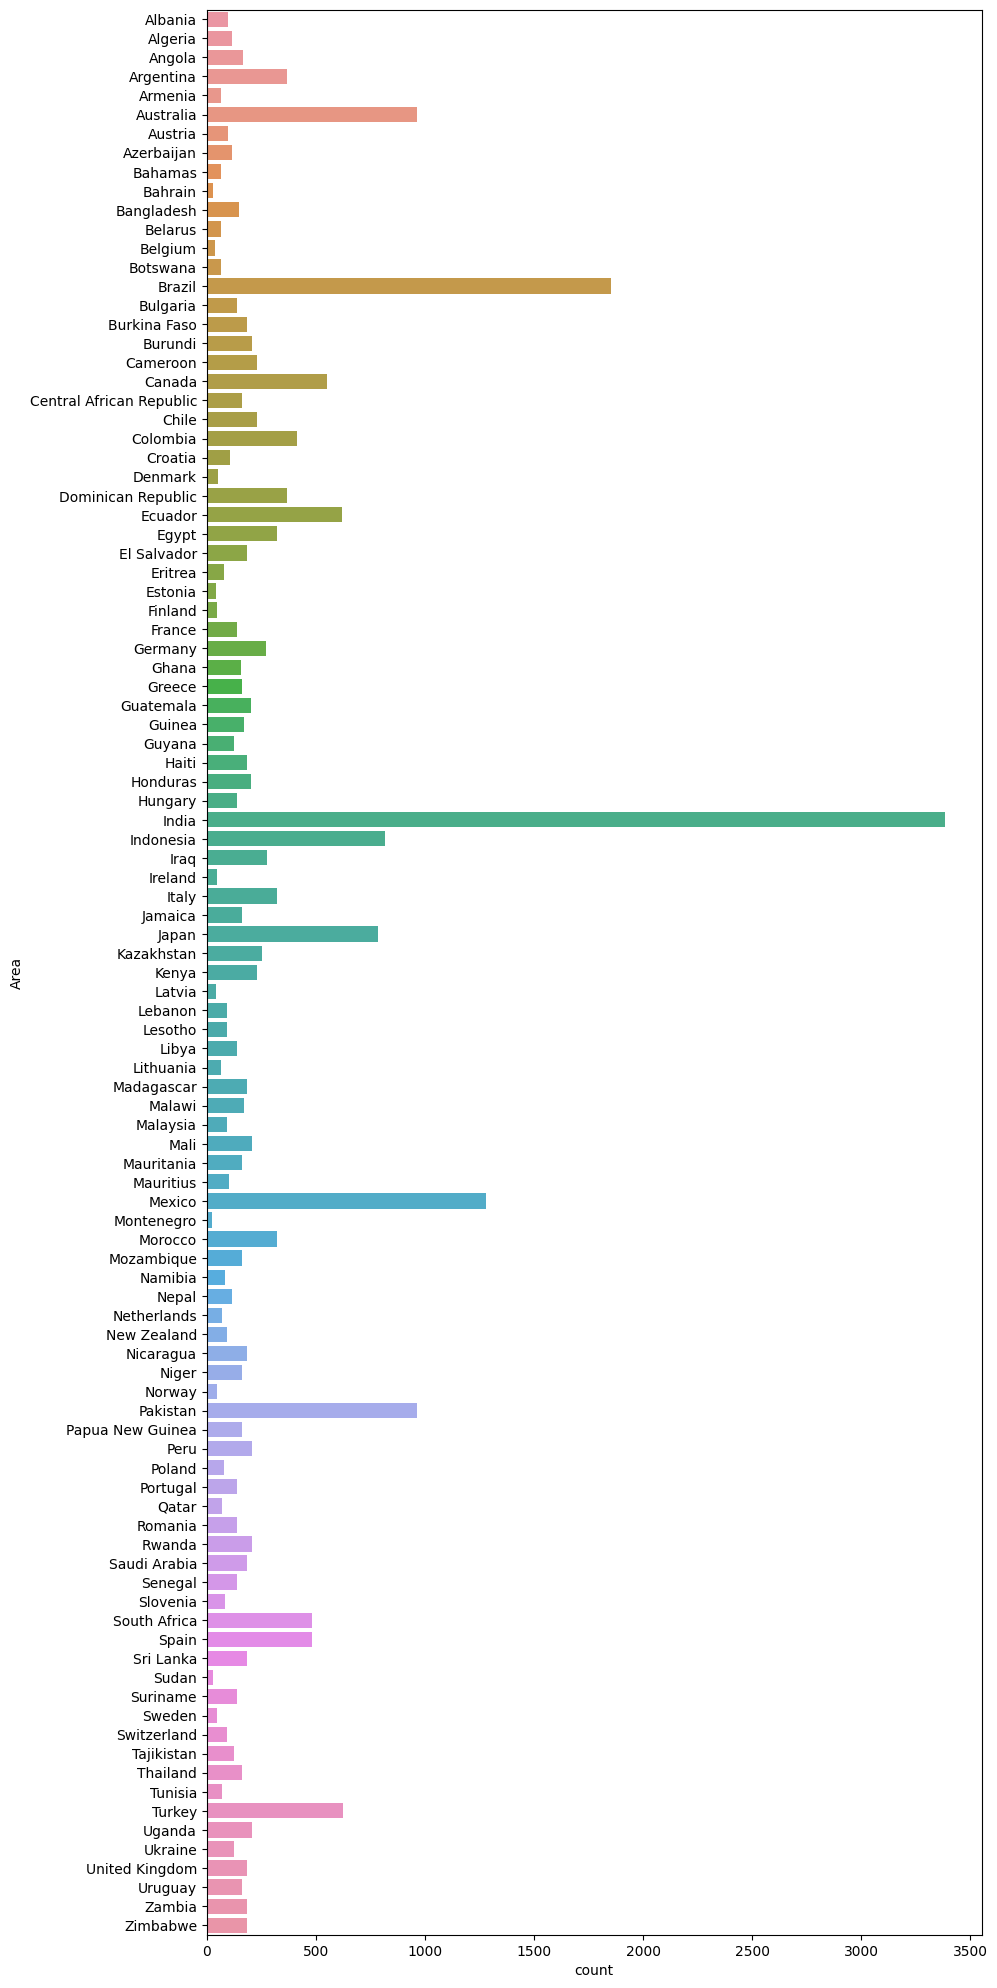

In [84]:
plt.figure(figsize=(10,25))
sns.countplot(y=df['Area'])
plt.show()

In [85]:
(df['Area'].value_counts() < 500).sum()

91

# Yield per Country

In [86]:
country = df['Area'].unique()

In [87]:
country

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [88]:
len(country)

101

In [89]:
for state in country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [90]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [91]:
df['hg/ha_yield'].sum()

1996196943

In [92]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

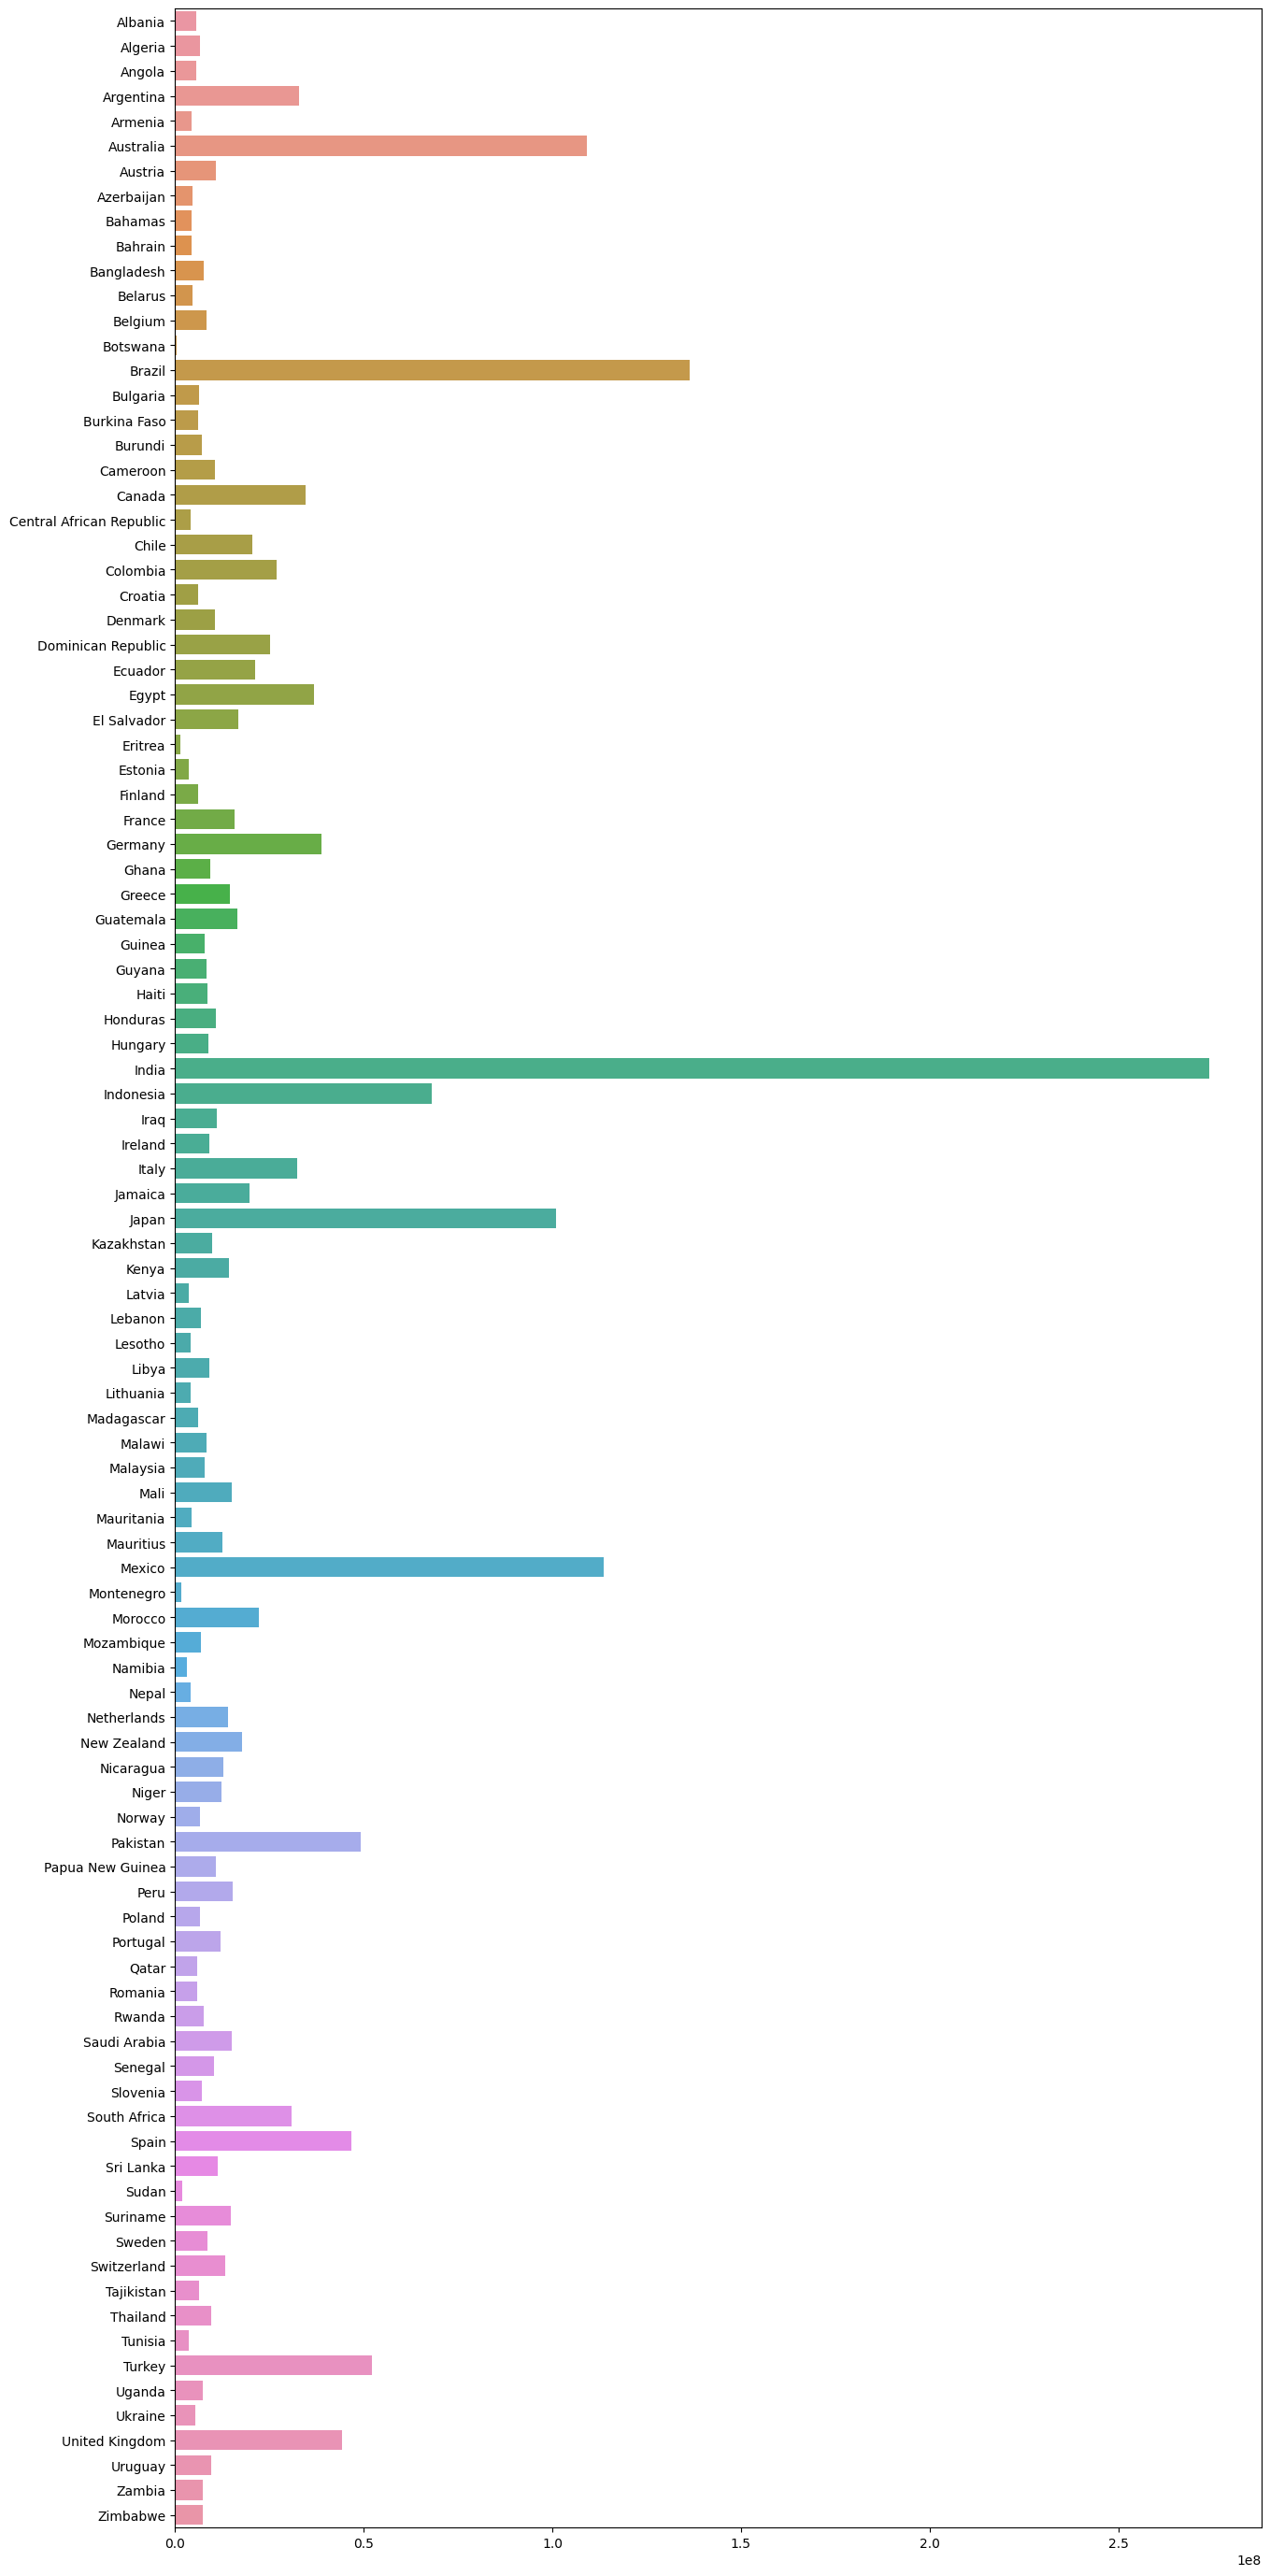

In [93]:
plt.figure(figsize=(15, 35))
sns.barplot(x=yield_per_country,y=country)
plt.show()

# Graph Frequency vs Item

In [94]:
df['Item'].value_counts()

Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: Item, dtype: int64

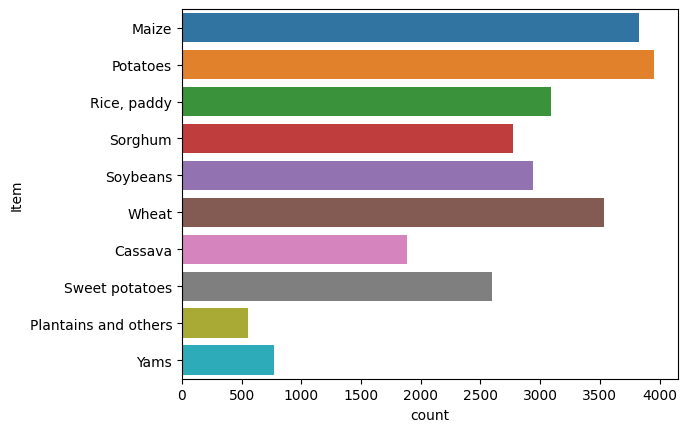

In [95]:
sns.countplot(y=df['Item'])
plt.show()

# Yield Vs Item

In [96]:
crops = df['Item'].unique()

In [97]:
len(crops)

10

In [98]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [99]:
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

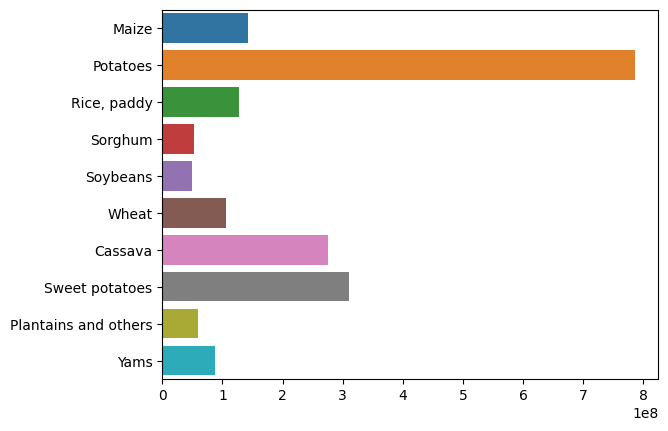

In [100]:
sns.barplot(y=crops,x=yield_per_crop)
plt.show()

# Train Test split Rearranging Columns

In [101]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

In [102]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [103]:
X = df.iloc[:, :-1] # X = df.drop('hg/ha_yield', axis=1)
y = df.iloc[:, -1] # Y = df('hg/ha_yield')

In [104]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [107]:
X_train.shape

(20745, 6)

In [108]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
4907,2005,608.0,2232.25,8.58,Bulgaria,Soybeans
10399,1995,589.0,7715.00,10.34,Hungary,Wheat
23617,1993,854.0,8985.00,15.33,Portugal,"Rice, paddy"
16174,2012,2051.0,909.71,27.51,Jamaica,Sweet potatoes
9077,2007,700.0,40740.64,10.88,Germany,Maize
...,...,...,...,...,...,...
14326,2012,1083.0,52980.00,25.09,India,Soybeans
21268,2002,1732.0,4170.00,13.28,New Zealand,Maize
10415,1998,589.0,5280.00,10.35,Hungary,Sorghum
11542,1995,1083.0,61257.00,25.92,India,Wheat


In [109]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
17096,2012,1668.0,54716.40,13.11,Japan,Wheat
723,2012,591.0,136185.08,18.18,Argentina,Soybeans
7132,1992,1410.0,4971.00,26.45,Dominican Republic,Sorghum
8552,2009,1784.0,3333.88,26.21,El Salvador,Sweet potatoes
9740,1998,1651.0,181.35,27.63,Guinea,"Rice, paddy"
...,...,...,...,...,...,...
23168,1992,3142.0,121.00,25.30,Papua New Guinea,"Rice, paddy"
10444,2004,589.0,9940.50,10.37,Hungary,"Rice, paddy"
27747,1994,1300.0,2272.08,17.17,Uruguay,Wheat
22842,2009,494.0,3957.61,26.68,Pakistan,Maize


In [110]:
y_train

4907      22239
10399     41644
23617     52273
16174    170818
9077      94475
          ...  
14326     13530
21268     76544
10415     20486
11542     25590
2955      23629
Name: hg/ha_yield, Length: 20745, dtype: int64

In [111]:
y_test

17096    41004
723      22814
7132     25700
8552     61191
9740     17132
         ...  
23168    17695
10444    34097
27747    25653
22842    34879
2043     78182
Name: hg/ha_yield, Length: 5187, dtype: int64

# Converting Categorical to Numerical and Scaling the values

In [112]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

In [113]:
preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [114]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3]),
                                ('OHE', OneHotEncoder(drop='first'), [4, 5])])

In [115]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [116]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122865 stored elements in Compressed Sparse Row format>

In [117]:
X_test_dummy

<5187x113 sparse matrix of type '<class 'numpy.float64'>'
	with 30739 stored elements in Compressed Sparse Row format>

In [118]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Model Training

In [119]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [120]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('KNeighbours', KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('Ridge', Ridge()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train_dummy,y_train)
    y_pred = model.predict(X_test_dummy)
    results.append(y_pred)
    names.append(name)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")



Linear Regression : mae : 29907.485960326852 score : 0.7473120796686342
Lasso : mae : 29893.99762450549 score : 0.7473261756207235


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


KNeighbours : mae : 4620.037285521496 score : 0.9849021762487353
DecisionTree : mae : 3892.2116830537884 score : 0.9797762802725813
Ridge : mae : 29864.77860086359 score : 0.7473043620328177


# Algo Comparison

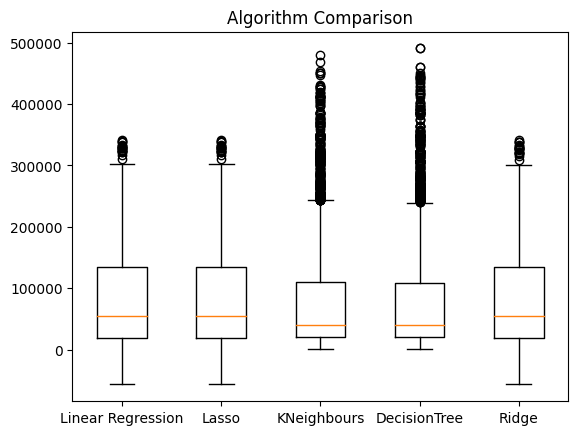

In [121]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Model Selection

In [122]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 16135., 34879., 79048.])

# Predictive System

In [123]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [124]:
result

array([36613.])

# Pickle File


In [125]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [126]:
import sklearn
print(sklearn.__version__)

1.2.0
